### Logistic Regression Explained 📈

* **Definition:** A **supervised machine learning algorithm** used for **classification**, which predicts a **categorical outcome** (e.g., yes/no, 0/1) by estimating the probability of a given input belonging to a certain class.
* **Main Goal:** To model the relationship between the independent variables and a **binary output** by fitting an S-shaped curve to the data.

***

### How It Works 🧠

* **Linear Foundation:** It starts with a standard linear regression equation, but it doesn't use the output directly.
* **The Sigmoid Function:** The result of the linear equation is passed through a **sigmoid function**. This function transforms the output into a value between 0 and 1, which can be interpreted as a probability.
* **Decision Boundary:** The model then uses a **decision boundary** (typically at a probability of 0.5) to classify the data point. If the calculated probability is above the boundary, it's assigned to one class; if it's below, it's assigned to the other.



***

### Key Differences from Linear Regression 📉

| Feature | **Linear Regression** | **Logistic Regression** |
| :--- | :--- | :--- |
| **Problem Type** | **Regression** (predicts continuous values) | **Classification** (predicts categorical values) |
| **Output** | A continuous number (e.g., 25.5, 100) | A probability between 0 and 1 |
| **Equation** | A straight line ($y = mx+c$) | A sigmoid function to transform the linear equation's output |

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
df=pd.read_csv(r"G:\Docs\Macchine Learning\Logistic Regression\Logistic Regression.csv")
df.head()

,Age,Annual_Income,Years_Experience,Education_Level,Gender,Purchased
0,56,24000,3,3,1,0
1,46,90588,18,2,1,0
2,32,113610,19,1,0,1
3,60,117856,32,3,0,1
4,25,58304,19,2,0,1


In [3]:
x=df[["Age","Annual_Income","Years_Experience","Education_Level","Gender"]]
y=df["Purchased"]
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=42)

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
log_model= LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_pred = log_model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.72
Confusion Matrix:
 [[ 3 14]
 [ 7 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.18      0.22        17
           1       0.78      0.88      0.83        58

    accuracy                           0.72        75
   macro avg       0.54      0.53      0.53        75
weighted avg       0.67      0.72      0.69        75



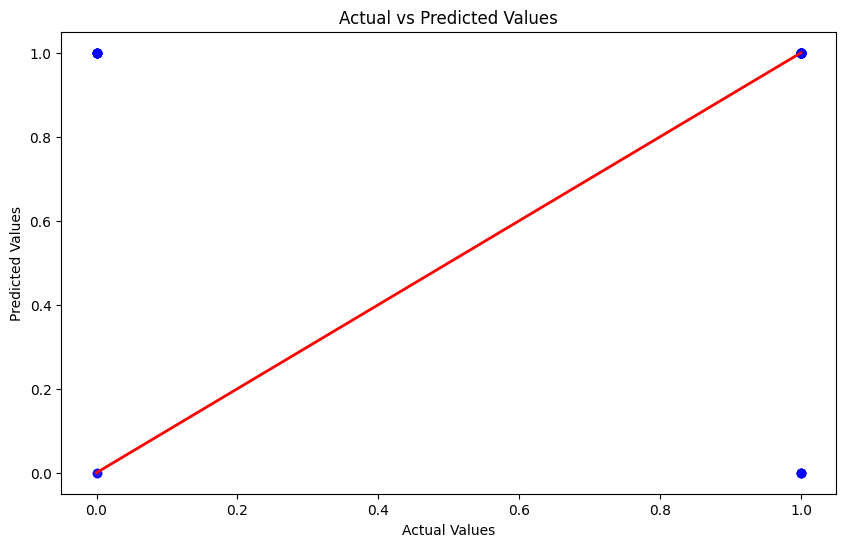

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()